In [1]:
from google.colab import files
upload = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
import pandas as pd
df= pd.read_csv(io.BytesIO(upload['Mall_Customers.csv']))

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters = 4)

In [ ]:
Kmeans.fit(df[["Age","Spending Score (1-100)"]])

x = df["Age"]
y = df["Spending Score (1-100)"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Spending Score (1-100)')

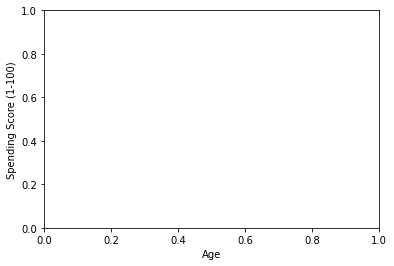

In [ ]:
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

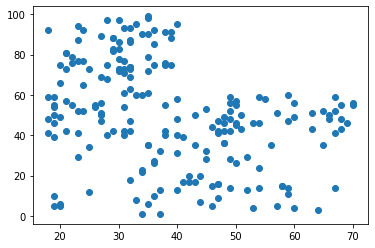

In [ ]:
# plt.plot(x,y)
plt.scatter(x,y)

In [ ]:
Kmeans.cluster_centers_

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

In [ ]:
df['cluster'] = Kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [ ]:
df["cluster"].value_counts()

1    57
2    48
0    48
3    47
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


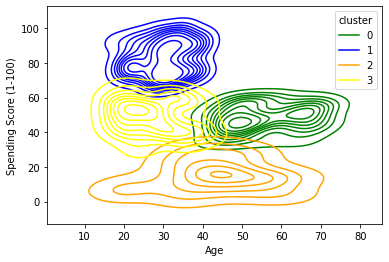

In [ ]:
# sns.scatterplot(x,y,hue="cluster",data=df)
sns.kdeplot(x,y,hue="cluster",data=df,palette=["green","blue","orange","yellow"])

In [ ]:
# WCSS = within cluster sum of square
K_range = range(1,12)
wcss = []
for k in K_range:
  KM = KMeans(n_clusters=k)
  KM.fit(df[["Age","Spending Score (1-100)"]])
  wcss.append(KM.inertia_)
wcss



[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23810.462233071365,
 19566.522341377604,
 15514.19313435103,
 13030.516278166278,
 11465.018717836108,
 10142.913791615621,
 9468.050772198076]

In [ ]:
x=K_range
y=wcss

Text(0, 0.5, '[171535.5, 75949.15601023017, 45840.67661610867, 28165.58356662934, 23810.462233071365, 19566.522341377604, 15514.19313435103, 13030.516278166278, 11465.018717836108, 10142.913791615621, 9468.050772198076]')

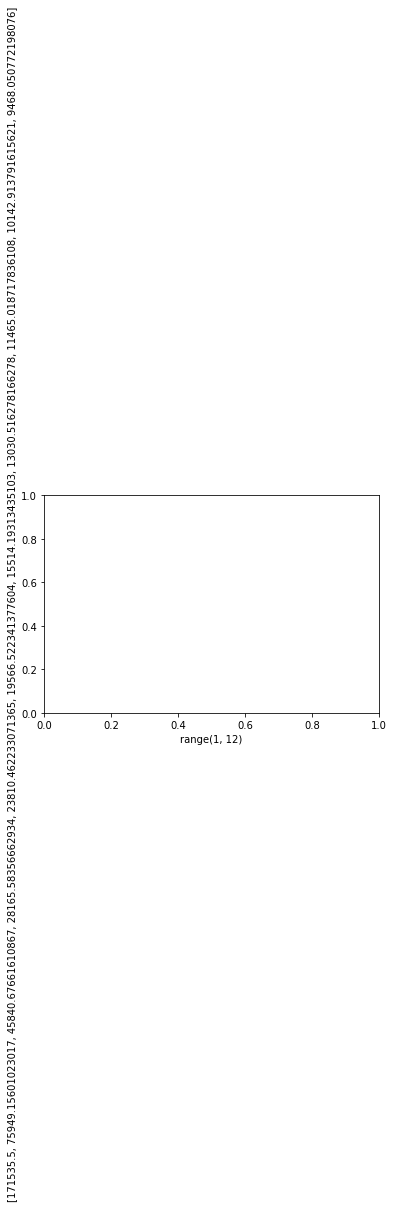

In [ ]:
plt.xlabel(x)
plt.ylabel(wcss)

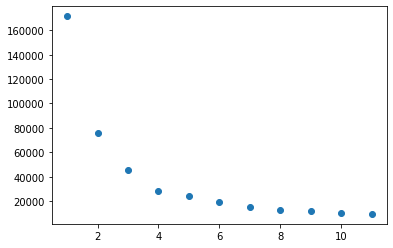

In [ ]:
plt.scatter(x,y)

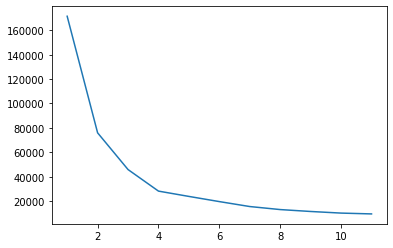

In [ ]:
plt.plot(x,y)